# **Tempo medio Cracking di una password**
Questa tabella rappresenta visivamente, tramite una scala cromatica, il tempo stimato per decifrare (tramite un attacco a forza bruta) una password in funzione della lunghezza (riga) e del tipo di caratteri utilizzati (colonna). I dati sono stati **ricavati manualmente** dal report 2024 di Hive Systems ([fonte](https://www.hivesystems.com/blog/are-your-passwords-in-the-green?utm_source=tabletext)).

Ogni cella mostra quanto tempo impiegherebbe un attaccante con hardware moderno a violare una specifica combinazione di password. Il colore comunica **l’urgenza o la robustezza** della protezione:

 - 🔴 Rosso: password istantaneamente violate
 - 🟠 Arancioni: da secondi a pochi minuti
 - 🟡 Gialli: da ore a giorni
 - 🟢 Verdi: da mesi a decenni (soglia accettabile minima)
 - 🔵 Azzurri: protezione molto elevata (secoli, millenni)

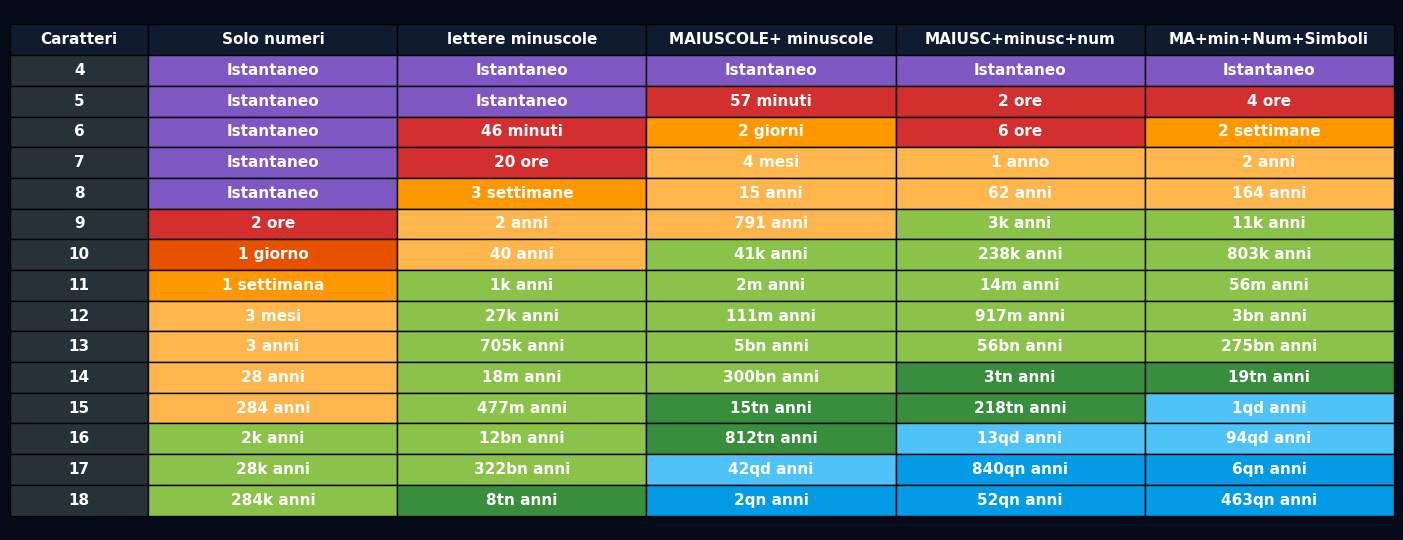

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv("tempi_cracking_password_2024.csv")
# nomi colonne
df.columns = [
    "Caratteri",
    "Solo numeri",
    "lettere minuscole",
    "MAIUSCOLE+ minuscole",
    "MAIUSC+minusc+num",
    "MA+min+Num+Simboli"
]
# mapping colore  per parola chiave
def keyword_color(cell):
    val = str(cell).lower()
    if "istantaneo" in val:
       #return "#d32f2f"  
        return "#7E57C2"
    if "minuti" in val:
        return "#d32f2f"
    if "ore" in val:
        return "#d32f2f" 
    if "giorno" in val:
        return "#e65100"  
    if "giorni" in val:
        return "#ff9800"  
    if "settimana" in val: 
         return "#ff9800"  
    if "settimane" in val:
        return "#ff9800"  
    if "mese" in val:
         return "#ff9800"
    if "mesi" in val:
         return "#ffb74d" 
    if "anno" in val:
         return "#ffb74d"  
    #regex per cercare un numero reale scritto in cifre decimali seguito dalla parola anni.
    if re.search(r"\b\d+\s*anni\b", val):  # # \b = word boundary, \d+ = una o più cifre, \s* = zero o più spazi, 'anni' = match letterale, \b = fine parola
         return "#ffb74d"     
    if "k anni" in val or "m anni" in val:
          return "#8bc34a"     
    if "bn" in val:
        return "#8bc34a"  
    if "tn" in val:
        return "#388e3c"
    if "qd" in val: 
        return "#4fc3f7" 
    if "qn" in val:
        return "#039be5"   
    return "#37474f"  # fallback 
# generazione matrice colori
colors = []
for _, row in df.iterrows():
    row_colors = ["#263238"]
    row_colors += [keyword_color(val) for val in row[1:]]
    colors.append(row_colors)
# tabella
fig, ax = plt.subplots(figsize=(14, 5.5))
ax.axis("off")
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    cellColours=colors,
    colWidths=[0.10] + [0.18] * (df.shape[1] - 1),
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)
# Header
for col in range(len(df.columns)):
    table[(0, col)].set_facecolor("#0f1c2f")
    table[(0, col)].set_text_props(color='white', fontweight='bold')
# stile uniforme al testo di tutte le celle
for r in range(1, len(df) + 1):
    for c in range(len(df.columns)):
        table[(r, c)].set_text_props(color='white', fontweight='bold')

fig.patch.set_facecolor("#050b18")
plt.tight_layout()
plt.show()